In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [7]:
df = pd.read_csv("../data/raw/coches.csv")

In [8]:
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


In [9]:
df.tail()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
49995,730210734bfbe1d3df878d5df71246f2,9881bcdd5a0ad4733037b3fb25e69c3a,HYUNDAI,i30,HYUNDAI i30 1.4 TGDI Tecno Fastback DCT 5p.,18490,16490.0,Gasolina,2018.0,47000,...,5,Automático,Gris / Plata,26,True,Flexicar Málaga,Málaga,Spain,2020-11-24 19:59:52,2021-01-15 00:00:00
49996,732b04fb47dd9559dbdcd099c5af484e,9881bcdd5a0ad4733037b3fb25e69c3a,RENAULT,Laguna,RENAULT Laguna Coupe Limited 2.0 Energy dCi 15...,14500,13551.0,Diésel,2015.0,68750,...,2,Manual,KNG Gris Casiopea (metalizado),30,True,Ocasion Plus,Málaga,Spain,2021-01-13 17:02:41,2021-01-15 00:00:00
49997,c10afb53957fb8012707239bdfa66018,9881bcdd5a0ad4733037b3fb25e69c3a,PEUGEOT,108,PEUGEOT 108 TOP Allure VTi 52kW 72CV 5p.,11000,9000.0,Gasolina,2019.0,21422,...,5,Manual,Gris / Plata,17,True,Psa Retail Huelva,Huelva,Spain,2021-01-08 16:47:24,2021-01-15 00:00:00
49998,f74363a6688ba11b71b4d980a959b8d3,9881bcdd5a0ad4733037b3fb25e69c3a,AUDI,RS4,AUDI RS4 Avant 4.2 FSI 450cv quattro 5p.,47900,NaN,Gasolina,2013.0,47900,...,5,Automático,Gris / Plata (Antracita),20,True,Codigocar Lugo,Lugo,Spain,2021-01-13 16:22:53,2021-01-15 00:00:00
49999,3d60801ccb96ef038747130e8a34ceda,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C2,CITROEN C2 1.4 HDI VTR Plus 3p.,2790,NaN,Diésel,2006.0,106000,...,3,Manual,Negro,21,True,AUTOVALENCIA 19,Barcelona,Spain,2021-01-10 16:32:41,2021-01-15 00:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

In [11]:
df.describe()

,price,price_financed,year,kms,power,doors,photos
count,50000.000000,23563.000000,49998.000000,5.000000e+04,41472.000000,50000.000000,50000.000000
mean,15166.270260,18480.029283,2012.311032,1.163591e+05,146.396388,4.505380,16.199120
std,16485.669747,13389.800738,6.677760,1.072921e+05,71.283964,0.868001,12.422882
min,300.000000,700.000000,1970.000000,0.000000e+00,29.000000,2.000000,0.000000
25%,5500.000000,10790.000000,2007.000000,3.830000e+04,109.000000,4.000000,7.000000
50%,11750.000000,15500.000000,2015.000000,9.999900e+04,130.000000,5.000000,13.000000
75%,19800.000000,21995.000000,2018.000000,1.749000e+05,163.000000,5.000000,23.000000
max,549900.000000,428999.000000,2021.000000,5.000000e+06,800.000000,5.000000,54.000000


In [12]:
df[df.duplicated()]

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date


In [13]:
df.isna().sum()

url                    0
company                0
make                   2
model                  5
version                0
price                  0
price_financed     26437
fuel                  46
year                   2
kms                    0
power               8528
doors                  0
shift                111
color                594
photos                 0
is_professional        0
dealer                 0
province               6
country                0
publish_date           0
insert_date            0
dtype: int64

In [14]:
df[df['make'] == 'DAEWOO']

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
1831,c6eeeb069f83f79b1dc88d8f5187340e,9881bcdd5a0ad4733037b3fb25e69c3a,DAEWOO,Nubira,DAEWOO Nubira CLASSIC 1.6 SE 5p.,690,NaN,Gasolina,2000.0,22700,...,5,Manual,Azul,27,False,a660439bf2096c599c766209160f5bbc,Madrid,Spain,2021-01-01 23:02:19,2021-01-15 00:00:00
2618,1aa5167683e1ff58cb935ecbb557c610,9881bcdd5a0ad4733037b3fb25e69c3a,DAEWOO,Nubira,DAEWOO Nubira 1.6 SX 5p.,2490,NaN,Gasolina,2004.0,80000,...,5,Manual,Verde,10,True,AUTOMOVILES NOU OCASION FRAN,Valencia,Spain,2021-01-06 11:00:27,2021-01-15 00:00:00
3462,194ef979012ec14fcef964e3af00b416,9881bcdd5a0ad4733037b3fb25e69c3a,DAEWOO,Matiz,DAEWOO Matiz CD 5p.,1000,NaN,Gasolina,2002.0,47000,...,5,Manual,Gris / Plata,6,False,67a2a324cb08c0b2f02d096eceee933b,Almería,Spain,2020-12-28 17:26:17,2021-01-15 00:00:00
4225,2a83bb84e7d34beae54169dda2e5aca2,9881bcdd5a0ad4733037b3fb25e69c3a,DAEWOO,Lanos,DAEWOO,1000,NaN,Gasolina,2001.0,35000,...,3,Manual,Rojo,5,False,92a1c9ccfe96b3d9a1398a5de818282e,Sevilla,Spain,2020-12-23 16:20:32,2021-01-15 00:00:00
4609,d3241e9a606152cf06261df2386a184f,9881bcdd5a0ad4733037b3fb25e69c3a,DAEWOO,Lanos,DAEWOO Lanos 1.5 SE 3p.,695,NaN,Gasolina,1999.0,133500,...,3,Manual,Gris / Plata,3,False,ab02fceb9689114b1cd1844e456c0695,Málaga,Spain,2020-10-14 09:45:12,2021-01-15 00:00:00
4881,87951ba5b1bfce32b3769b0bb7a1b62f,9881bcdd5a0ad4733037b3fb25e69c3a,DAEWOO,Evanda,DAEWOO Evanda 2.0 CDX 4p.,1999,NaN,Gasolina,2004.0,90000,...,4,Manual,Beige,12,True,JCars.es,Valencia,Spain,2021-01-04 12:45:37,2021-01-15 00:00:00
9336,e714f7a547faf37965f6e0e83e1f8232,9881bcdd5a0ad4733037b3fb25e69c3a,DAEWOO,Nubira,DAEWOO Nubira 1.6 SX ano modelo 2004 4p.,1700,NaN,Gasolina,2004.0,160000,...,4,Manual,Verde,23,False,464e07afc9e46359fb480839150595c5,Madrid,Spain,2020-12-15 12:53:34,2021-01-15 00:00:00
11154,8ae7396055a2ff9fdacd65f5e7d38ae9,9881bcdd5a0ad4733037b3fb25e69c3a,DAEWOO,Matiz,DAEWOO Matiz 1.0 CD 5p.,1999,NaN,Gasolina,2004.0,45000,...,5,Manual,Verde,9,True,Autos&Camper,Zaragoza,Spain,2021-01-05 11:28:56,2021-01-15 00:00:00
11210,9f3dce3a5e413dba036812928832cdac,9881bcdd5a0ad4733037b3fb25e69c3a,DAEWOO,Lanos,DAEWOO Lanos 3p.,1300,NaN,Gasolina,1999.0,60000,...,3,Manual,Rojo,3,False,0a727460658d6897c9e9d0fcdbce53f3,Valencia,Spain,2020-12-24 17:48:21,2021-01-15 00:00:00
12248,b094ff8ba65cea35251577732ef8c1b4,9881bcdd5a0ad4733037b3fb25e69c3a,DAEWOO,Matiz,DAEWOO Matiz SE 5p.,2500,NaN,Gasolina,2002.0,45000,...,5,Manual,Gris / Plata,54,True,Automoción Pere,Tarragona,Spain,2020-12-27 22:30:41,2021-01-15 00:00:00


Hay varias marcas que se pueden denominar de lujo, por lo que habría que crear otra columna de lujo, también hay alguna Marca que son la misma por lo que hay que unificarlas.

In [15]:
len(df['model'].unique())

941

In [16]:
len(df['version'].unique())

17397

In [17]:
df['fuel'].unique()

array(['Diésel', 'Gasolina', 'Híbrido enchufable', 'Eléctrico',
       'Gas natural (CNG)', 'Híbrido', 'Gas licuado (GLP)', nan],
      dtype=object)

In [18]:
df['shift'].unique()

array(['Manual', 'Automático', nan], dtype=object)

In [19]:
df['color'].unique()

array(['Verde', 'Blanco', 'Azul', ..., 'Gris Urano (sólido)',
       'Blanco (ICE WHITE SOLID)',
       'Azul (OFERTA MES!!! ENTREGA INMEDIATA!!!)'], dtype=object)

In [20]:
df['province'].unique()

array(['Navarra', 'Tenerife', 'Barcelona', 'Sevilla', 'Madrid',
       'Baleares', 'Alicante', 'Murcia', 'Guipúzcoa', 'Málaga', 'Jaén',
       'Las Palmas', 'Granada', 'Lugo', 'Huelva', 'Asturias',
       'Pontevedra', 'Córdoba', 'Zaragoza', 'León', 'A Coruña',
       'Cantabria', 'Toledo', 'Vizcaya', 'Burgos', 'Lleida', 'Almería',
       'Badajoz', 'Álava', 'Valencia', 'Cádiz', 'La Rioja', 'Girona',
       'Ciudad Real', 'Ávila', 'Tarragona', 'Orense', 'Segovia',
       'Cáceres', 'Cuenca', 'Albacete', 'Castellón', 'Guadalajara',
       'Huesca', 'Teruel', 'Valladolid', 'Salamanca', 'Soria', 'Palencia',
       'Zamora', 'Ceuta', nan, 'Melilla'], dtype=object)

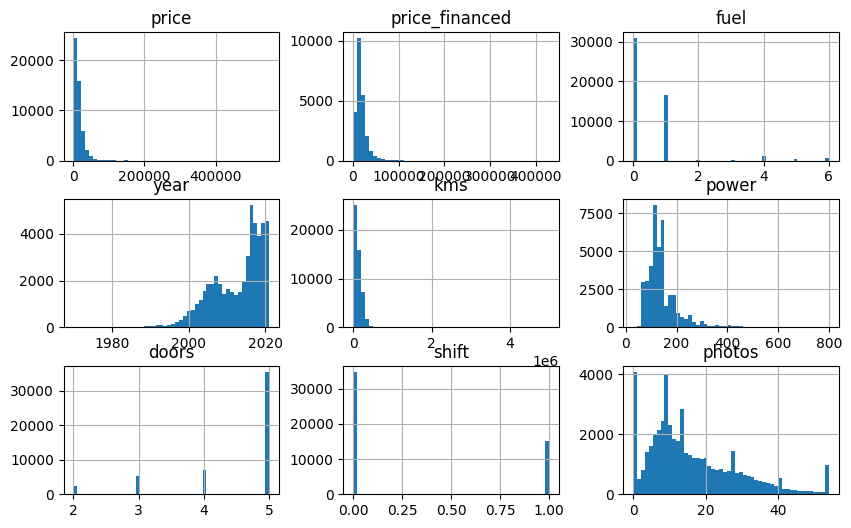

In [21]:
df.replace({'Gasolina':1, 'Diésel':0, 'Híbrido enchufable':5, 'Eléctrico':6, 'Gas natural (CNG)':2, 'Híbrido':4, 'Gas licuado (GLP)':3, 'Manual': 0, 'Automático': 1}).hist(bins=50, figsize=(10, 6));

In [22]:
df1 = df.copy()

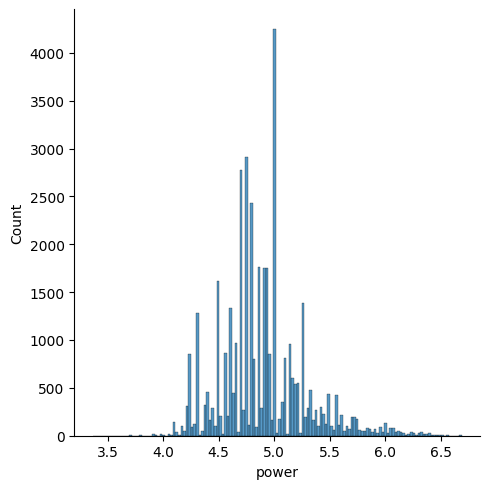

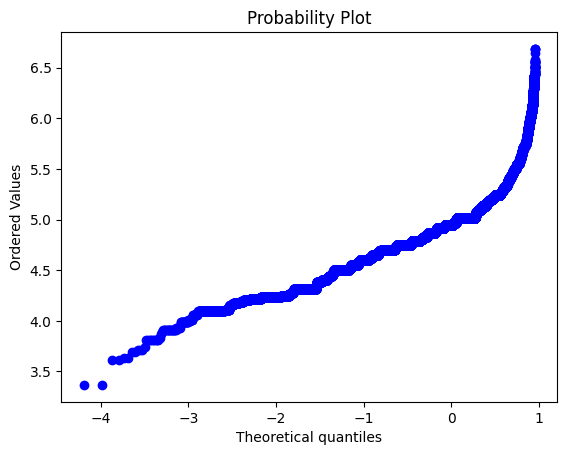

In [35]:
df1['power'] = np.log(df['power'])

sns.displot(df1['power']);
fig = plt.figure()
res = stats.probplot(df1['power'], plot=plt)

c:\Users\IFHIV2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\IFHIV2\Documents\Master Data\DS_PT_09_2023\.venv\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


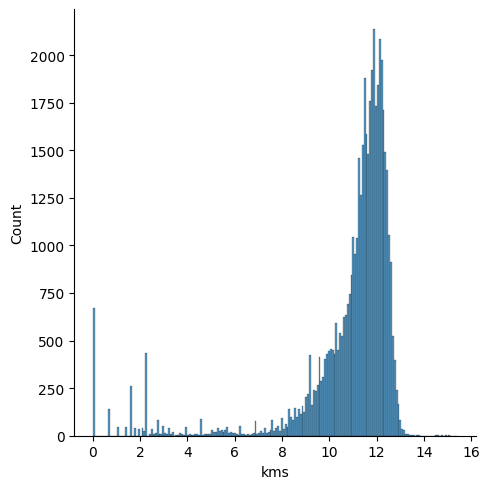

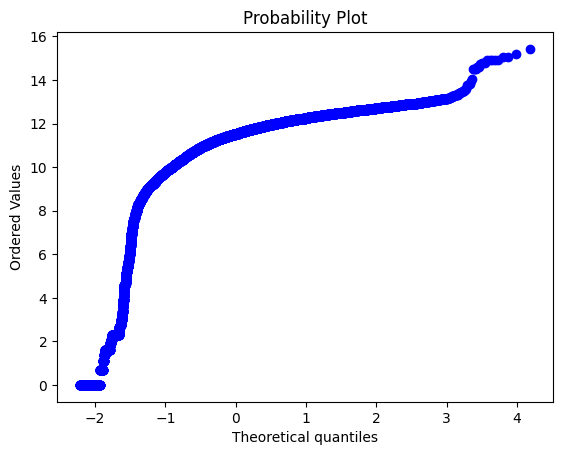

In [36]:
df1['kms'] = np.log(df['kms'])

sns.displot(df1['kms']);
fig = plt.figure()
res = stats.probplot(df1['kms'], plot=plt)

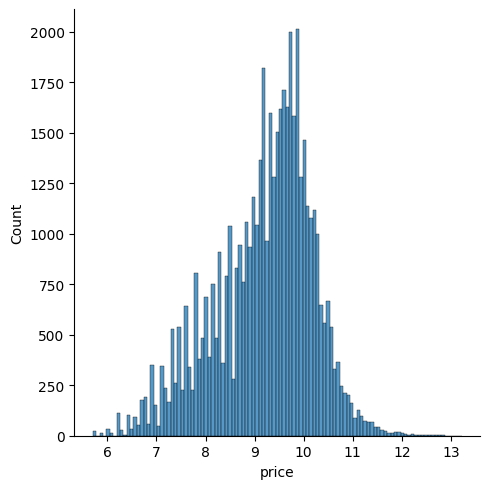

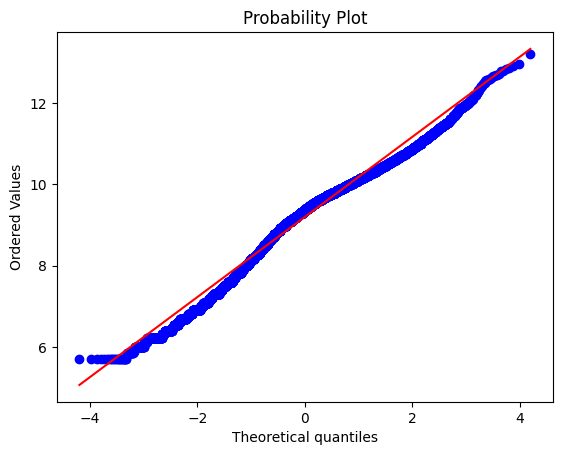

In [37]:
df1['price'] = np.log(df['price'])

sns.displot(df1['price']);
fig = plt.figure()
res = stats.probplot(df1['price'], plot=plt)

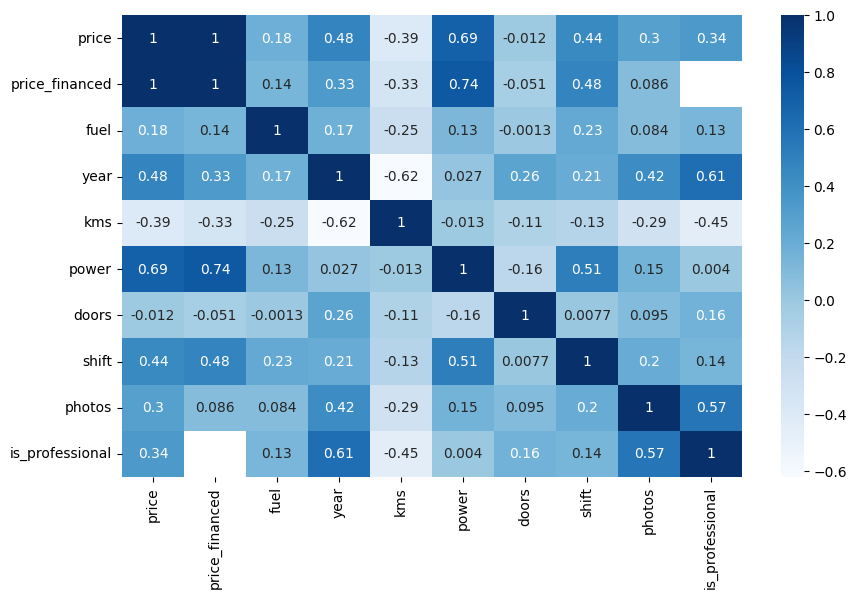

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.replace({'Gasolina':1, 'Diésel':0, 'Híbrido enchufable':5, 'Eléctrico':6, 'Gas natural (CNG)':2, 'Híbrido':4, 'Gas licuado (GLP)':3, 'Manual': 0, 'Automático': 1}).corr(numeric_only=True), annot=True, cmap='Blues');

Se puede observar que el combustible, el año, la potencia, el tipo de cambio y si el vendedor es profesional es lo que más influye. Y que quitando los kilómetros y número de puertas podemos quitar ruido al modelo.

<Axes: xlabel='price', ylabel='percent'>

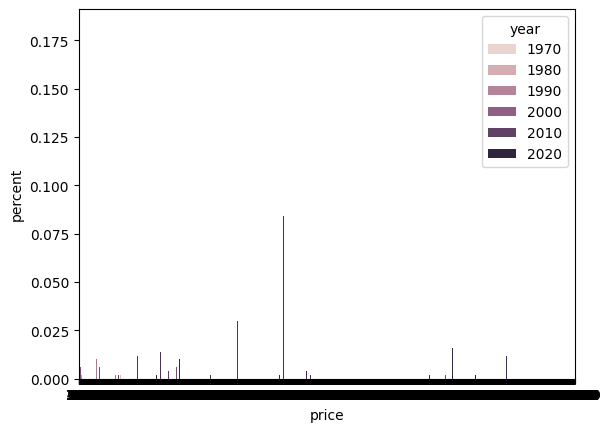

In [18]:
sns.countplot(x='price',data=df, hue='year', stat='percent')

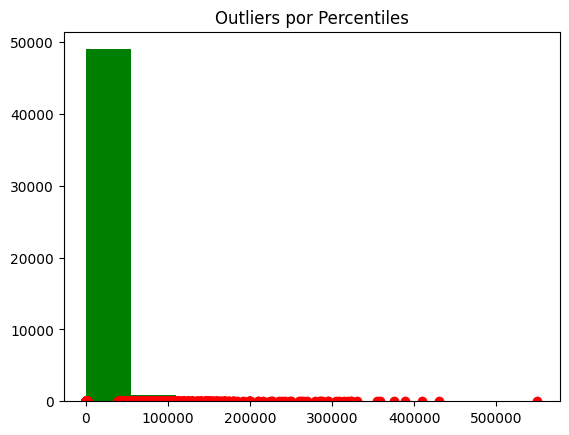

In [37]:
percentiles = df["price"].quantile([0.05, 0.95])
precios = df["price"]
outliers_percentiles = precios[(precios < percentiles[0.05]) | (precios > percentiles[0.95])]

# Visualiza los outliers
plt.hist(precios, color='g')
plt.scatter(outliers_percentiles, np.zeros_like(outliers_percentiles), color='r')
plt.title("Outliers por Percentiles")
plt.show()

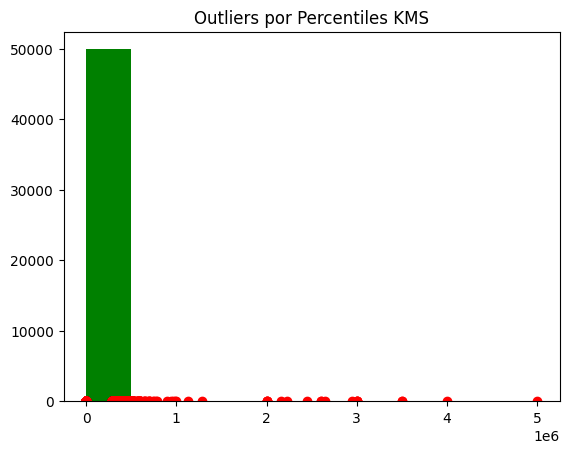

In [38]:
percentiles = df["kms"].quantile([0.05, 0.95])
precios = df["kms"]
outliers_percentiles = precios[(precios < percentiles[0.05]) | (precios > percentiles[0.95])]

# Visualiza los outliers
plt.hist(precios, color='g')
plt.scatter(outliers_percentiles, np.zeros_like(outliers_percentiles), color='r')
plt.title("Outliers por Percentiles KMS")
plt.show()

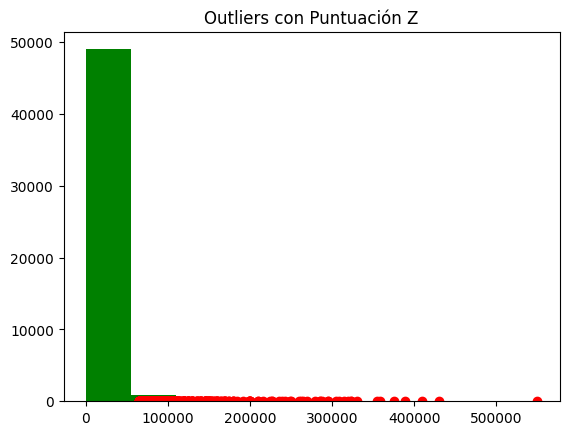

In [35]:
percentiles = df["power"].quantile([0.05, 0.95])
precios = df["power"]
outliers_percentiles = precios[(precios < percentiles[0.05]) | (precios > percentiles[0.95])]

# Visualiza los outliers
plt.hist(precios, color='g')
plt.scatter(outliers_percentiles, np.zeros_like(outliers_percentiles), color='r')
plt.title("Outliers por Percentiles KMS")
plt.show()